# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.cluster import KMeans

%matplotlib inline


os.getcwd()

'C:\\Users\\David Olivero\\AnacondaProjects\\Guided-Capstone'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
file_name = 'step3_output.csv'

resorts = pd.read_csv(file_name)
#resorts = pd.read_csv(file_name, index_col = 'Name')
# Since no information in trams, fastEight or fastSixes, drop them too:
resorts.drop(['Unnamed: 0'], axis = 1, inplace=True)
resorts.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,2
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,2


In [3]:
# Convert state information in Dataframe into 0's and 1's: 

#dfo=resorts.drop('Name',axis=1).select_dtypes(include=['object']) # select object type columns
#
#resorts = pd.concat([resorts.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

# Drop state info from Dataframe instead:
resorts.drop(['state'], axis=1, inplace=True)

In [4]:
# Declare an explanatory variable X,without'AdultWeekend'
X = resorts.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable y, AdultWeekend column
y = resorts['AdultWeekend'] 


scaler = StandardScaler().fit(X)
X_scaled=scaler.transform(X) 

# Use a test train 80/20 split of the data: 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)

In [5]:
# create and solve a general linear model of y based on X:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [6]:
# Make predictions of y based on model parameters:
y_pred = model.predict(X_test)

In [7]:
print('Model Performance:')
print('Explained Variance is', explained_variance_score(y_test, y_pred)*100, '%')
print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred))

Model Performance:
Explained Variance is 89.8639638613 %
Mean Absolute Error is 6.26712557548


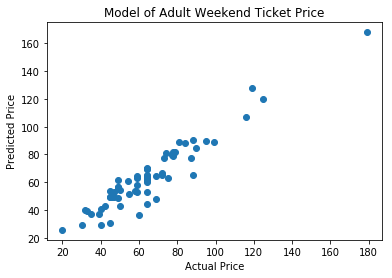

In [8]:
# Create scatter plot to compare actual price data to predicted price data from test set:
plt.scatter(y_test, y_pred)
plt.title('Model of Adult Weekend Ticket Price')
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.show()

In [9]:
# Create dataframe for coefficients
coef_df = pd.DataFrame(abs(model.coef_), X.columns, columns=['Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False).head(10)

,Coefficient
AdultWeekday,20.023068
SkiableTerrain_ac,4.294248
vertical_drop,2.068543
daysOpenLastYear,2.032827
summit_elev,1.693441
fastQuads,1.599454
projectedDaysOpen,1.421893
quad,1.391279
triple,1.330395
Snow Making_ac,1.171312


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [10]:
resorts.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
trams,1,0,0,0,0
fastEight,0,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2
triple,0,0,1,2,3
double,0,4,0,1,1


In [22]:
# Establish dataframe for Big Mtn aka Whitefish Mtn Resort:
bigmtn_df = resorts[resorts['Name'].str.contains('Whitefish')].drop(['Name','AdultWeekend'], axis=1)

# Actual current adult weekend ticket price for the resort:
bigmtn_price = resorts.loc[resorts['Name'] == 'Whitefish Mountain Resort','AdultWeekend']

# We will do two predictions, one in the "old" configuration of the resort:
X_scaledold = scaler.transform(bigmtn_df)
y_old = model.predict(X_scaledold)

# ...and one in the "new" configuration of the resort with an additional lift. 
#  We will assume new lift is a fastQuad and add it to the resort's other lifts: 
quad = resorts.loc[resorts['Name'] == 'Whitefish Mountain Resort','fastQuads']
quad = quad + 1
bigmtn_new = resorts[resorts['Name'].str.contains('Whitefish')].drop(['Name','AdultWeekend'], axis=1)
bigmtn_new['fastQuads'] = quad

X_scalednew = scaler.transform(bigmtn_new)
y_new = model.predict(X_scalednew)

#scaler.var_
#bigsky_df.T
print('Predicted Adult Weekend Ticket Price:', y_old)
print('Actual Adult Weekend Ticket Price:', bigmtn_price)
print('Projected Adult Weekend Ticket Price:', y_new, 'with new lift')


Predicted Adult Weekend Ticket Price: [ 85.69571111]
Actual Adult Weekend Ticket Price: 151    81.0
Name: AdultWeekend, dtype: float64
Projected Adult Weekend Ticket Price: [ 86.42440491] with new lift


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [12]:
X_scaledold = scaler.transform(bigmtn_df)



# Since fastQuads is a highly ranked coefficient, assume new lift is a fastQuad. 
quad = resorts.loc[resorts['Name'] == 'Whitefish Mountain Resort','fastQuads']
quad = quad + 1
bigmtn_new = resorts[resorts['Name'].str.contains('Whitefish')].drop(['Name','AdultWeekend'], axis=1)
bigmtn_new['fastQuads'] = quad

X_scalednew = scaler.transform(bigmtn_new)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [13]:
y_old = model.predict(X_scaledold)

y_new = model.predict(X_scalednew)


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [14]:
bigmtn_price = resorts.loc[resorts['Name'] == 'Whitefish Mountain Resort','AdultWeekend']

print('Predicted Adult Weekend Ticket Price:', y_old)
print('Actual Adult Weekend Ticket Price:', bigmtn_price)
print('Projected Adult Weekend Ticket Price:', y_new, 'with new lift')

Predicted Adult Weekend Ticket Price: [ 85.69571111]
Actual Adult Weekend Ticket Price: 151    81.0
Name: AdultWeekend, dtype: float64
Projected Adult Weekend Ticket Price: [ 86.42440491] with new lift


In [65]:
prices ={}
prices['current'] = np.array(bigmtn_price)
prices['current modeled'] = y_old
prices['modeled with extra lift'] = y_new
print(prices)

prices_df = pd.DataFrame(prices)
prices_df.head()

{'current': array([ 81.]), 'current modeled': array([ 85.69571111]), 'modeled with extra lift': array([ 86.42440491])}


,current,current modeled,modeled with extra lift
0,81.0,85.695711,86.424405


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

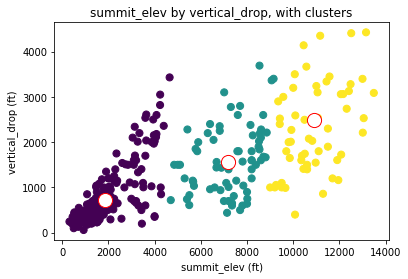

In [29]:
# Create clusters
clust_x = resorts.drop(['Name'], axis=1).values
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(clust_x)
centers = kmeans.cluster_centers_

plt.scatter(resorts['summit_elev'], resorts['vertical_drop'], c=resorts['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(centers[:, 0], centers[:, 1], c='white', edgecolor='red', s=200)
plt.xlabel('summit_elev (ft)')
plt.ylabel('vertical_drop (ft)')
plt.title('summit_elev by vertical_drop, with clusters')
plt.savefig('figures/fig1.png',bbox_inches='tight')

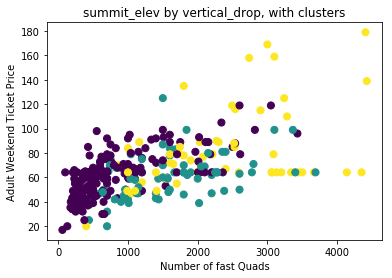

In [46]:
plt.scatter(resorts['vertical_drop'], resorts['AdultWeekend'], c=resorts['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(centers[:, 0], centers[:, 1], c='white', edgecolor='red', s=200)
#sns.regplot(x="AdultWeekend", y="vertical_drop", data=resorts, color="#440154FF", scatter_kws={"s": 25})
plt.xlabel('Number of fast Quads')
plt.ylabel('Adult Weekend Ticket Price')
plt.title('summit_elev by vertical_drop, with clusters')
plt.savefig('figures/fig1.png',bbox_inches='tight')

Text(0.5,1,'Model Comparison for Whitefish Mtn Resort')

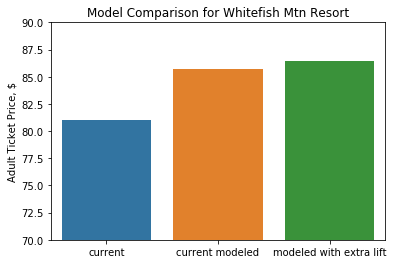

In [80]:
ax = sns.barplot(data = prices_df)
plt.ylim(70,90)
plt.ylabel('Adult Ticket Price, $')
plt.title('Model Comparison for Whitefish Mtn Resort')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [86]:
import pickle
s = pickle.dumps(model)
filehandler = open('models/regression_model_adultweekend.obj', 'wb')
pickle.dump(model, filehandler)
filehandler.close()

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [87]:
coeff_df = pd.DataFrame(abs(model.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('models/model_perf_metrics.csv')